In [20]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random as rd

In [22]:
# reading the values from the dataset
df = pd.read_csv("/content/drive/MyDrive/kaggle dataset/all_fuels_data.csv")
df.head()
d = df.dropna()
d

,ticker,commodity,date,open,high,low,close,volume
0,CL=F,Crude Oil,2000-08-23,31.950001,32.799999,31.950001,32.049999,79385
1,CL=F,Crude Oil,2000-08-24,31.900000,32.240002,31.400000,31.629999,72978
2,CL=F,Crude Oil,2000-08-25,31.700001,32.099998,31.320000,32.049999,44601
3,CL=F,Crude Oil,2000-08-28,32.040001,32.919998,31.860001,32.869999,46770
4,CL=F,Crude Oil,2000-08-29,32.820000,33.029999,32.560001,32.720001,49131
...,...,...,...,...,...,...,...,...
27010,BZ=F,Brent Crude Oil,2023-08-15,86.300003,86.669998,84.290001,84.889999,29945
27011,BZ=F,Brent Crude Oil,2023-08-16,85.120003,85.360001,83.120003,83.449997,31925
27012,BZ=F,Brent Crude Oil,2023-08-17,83.349998,84.889999,83.050003,84.120003,33977
27013,BZ=F,Brent Crude Oil,2023-08-18,83.830002,85.070000,83.320000,84.800003,33977


In [23]:
# creating a prediction class
class Prediction:


    def __init__(self, iterations, alpha):
        self.iterations = iterations
        self.alpha = alpha


    def fit(self, x, y):

        self.m, self.n = x.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.g = []
        self.d = []

        for i in range(self.iterations):
            gx = rd.randint(0, self.m -1)
            ranx = x[gx]
            rany = y[gx]
            y_pred = np.dot(ranx.T, self.w) + self.b
            dw = (1 / self.m) * np.dot(ranx.T, (y_pred - rany))
            db = (1 / self.m) * np.sum(y_pred - rany)
            self.w -= self.alpha * dw
            self.b -= self.alpha * db

    def pred(self, g):
        self.g = g
        y_pred = (np.dot(self.g, self.w) + self.b)
        return y_pred

In [24]:
gn = d.drop(columns = 'ticker', axis = 1)
ng = gn.drop(columns = 'commodity', axis = 1)
nn = ng.drop(columns = 'date', axis = 1)
gg = nn.drop(columns = 'close', axis = 1)
x = gg.drop(columns = 'volume', axis =1)
y = np.array(d["close"])

In [25]:
# normalizing the data values using sk-learn standardscalar
from sklearn.preprocessing import StandardScaler
gf = StandardScaler()
gf.fit(x)
standardized_data = gf.transform(x)
x = standardized_data
y = (y - np.mean(y)) / np.std(y)

In [26]:
# seperating the test train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

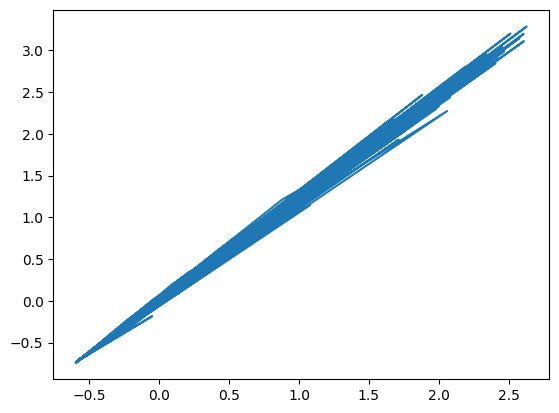

In [27]:
# predicting the values
Pred = Prediction(19500, 0.5)
Pred.fit(X_train, y_train)
y_pred = Pred.pred(X_test)
plt.plot(y_pred, y_test)
plt.show()

In [28]:
# checking the accuracy
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 5) *100))

The accuracy of our model is 96.38%
